<span style="color: #974efa  ; font-size: 32px;"><em>Art Network Analysis Project</em></span> 

**Task Description**

The cultural heritage sector is undergoing a significant transformation. Museums, galleries,
libraries, and archives are increasingly digitizing their collections, reshaping how these works
are accessed. This digitization democratizes cultural access, expanding the ways in which
artifacts are shared and represented. 

However, transitioning from physical to virtual spaces
demands careful consideration, as merely replicating physical collections online is not the
most efective approach for engaging with them. Therefore, developing innovative methods
for retrieving and interacting with this information is essential to fully realizing its potential.

For this assignment, you'll work with data from WikiArt, an extensive online art encyclopedia.
This dataset provides an opportunity to explore and analyze various aspects of the art world,
including artists, movements, institutions, nationalties, as well as examine their
interrelationships and associations.

Data:
The data consists of 4 CSV files, generated by scraping data from WikiArt:

• artists.csv: URL of the artist at WikiArt, id, image URL, nation, name, total of art work,
interval of active years.

• relationships.csv: URL of the artist at WikiArt, list of friends, list of artist that they were
in influenced by, list of artist that they influenced, list of art institutions that the artist
studied, list of schools that was part of, type (artist or collection).

• institution.csv: City, country, name, URL of the institution at WikiArt.

• schools.csv: name, school URL at WikiArt.

The goal is to answer the following questions:

1. Which were the most influential artists?
2. Which were the most influential movements?
3. Which were the most influential institutions?
4. Which nationalities concentrate the majority of artists?
5. Which are the biggest communities in the network?

**Step1 – Preprocessing and EDA**

- Checking for missing values.
- Data distribution (movements, nationalities, artworks, etc).

**Step 2 – Networkx**
- Create a network based on the given data: consider the nodes, the edges, the
attributes, etc.
- Visualize the network (or parts of the network) given visualization tools in python, if
needed use Cytoscape.
- BONUS points: interactive visualization (2 points) – you can get maxim 3 during
the entirety of the course.

**Step 3 – Network Analysis**
- Based on diferenet network analysis techniques (centrality measures, community
analysis, clustering algorithms), answer the questions (Goals: 1-5) above.

***

**Imports**

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# OS utilities
import os

# Collab
from google.colab import files

# Network & Graph
import networkx as nx
import plotly.graph_objects as go
from networkx.algorithms import community
from operator import itemgetter


**Settings and Constants**

In [2]:
# set pandas options to show dataframe columns on single lines
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)  # Wide enough for no wrapping
pd.set_option('display.max_colwidth', None)  # Avoid truncating long text

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Define ANSI escape codes for text
RED = "\033[91m"
GREEN = "\033[92m"
YELLOW = "\033[93m"
ORANGE = "\033[38;5;208m"
L_ORANGE = "\033[38;5;214m"
YELLOW_BG = '\033[43m'
GREY_BG = '\033[100m'
BLUE_BG = "\033[44m" 
RESET = "\033[0m"

***
# <span style="color: #f91974  ; font-weight: bold; font-size: 32px;">1.</span> <span style="color: #974efa  ; font-size: 32px;"><em>Preprocessing and EDA</em></span> 

- <span style="color: #cddeb3 ;"> Checking for missing values.</span> 
- <span style="color: #cddeb3 ;"> Data distribution (movements, nationalities, artworks, etc). </span>


## <span style="color: #b889f9; font-size: 24px;"> Data Load and Initial Exploration</span> 

**Initial Exploration**

We'll first load the dataset, check for missing values, and explore basic data structure.

**NOTE: UPLOAD THE FILES TO COLLAB HERE**

Upload Multiple Files: When you call files.upload(), you can select multiple files by holding down the Ctrl (or Cmd on Mac) key while clicking on the files you want to upload.

In [ ]:
# UPLOAD FILES
uploaded = files.upload()

In [3]:
# LOAD DATASETS
df_artists = pd.read_csv('artists.csv', header=0)
df_relationships = pd.read_csv('relationships.csv', header=0)
df_institutions = pd.read_csv('institutions.csv', header=0)
df_schools = pd.read_csv('schools.csv', header=0)

In [4]:
# PRINT DATASET INFO
print(f'{L_ORANGE}Artists DataFrame: {RESET}')
display(df_artists.head())
print(df_artists.info())
print("\nMissing values in Artists DataFrame:\n", df_artists.isnull().sum(), sep="")

print(f'\n{L_ORANGE}Relationships DataFrame: {RESET}')
display(df_relationships.head())
print(df_relationships.info())
print("\nMissing values in Relationships DataFrame:\n", df_relationships.isnull().sum(), sep="")

print(f'\n{L_ORANGE}Institutions DataFrame: {RESET}')
display(df_institutions.head())
print(df_institutions.info())
print("\nMissing values in Institutions DataFrame:\n", df_institutions.isnull().sum(), sep="")

print(f'\n{L_ORANGE}Schools DataFrame: {RESET}')
display(df_schools.head())
print(df_schools.info())
print("\nMissing values in Institutions DataFrame:\n", df_schools.isnull().sum(), sep="")

Artists DataFrame: 


artistUrl                        id                                                                                                                                              image     nation                                 title totalWorksTitle                  year
0  /en/ancient-egyptian-painting  5d230b31edc2c9fb74ae130a                        https://uploads2.wikiart.org/00244/images/ancient-egyptian-painting/stela-of-aafenmut-ca-924-889-b-c.jpg!PinterestLarge.jpg  Egyptians                         Ancient Egypt    169 artworks  c.3150 BC - c.640 AD
1      /en/ancient-greek-pottery  5ced09b1edc2c993247c1ea0                                             https://uploads7.wikiart.org/00238/images/ancient-greek-pottery/hb-14-136-av5-1.jpg!PinterestLarge.jpg     Greeks                 Ancient Greek Pottery     87 artworks         c.900 - 31 BC
2     /en/ancient-greek-painting  5ce3c54dedc2c921c4035b7d                                            https://uploads8.wikiart.org/00237/images/ancient-greek-painting/181029-r33122-1.jpg!PinterestLarge.jpg     Greeks  Ancient Greek Painting and Sculpture     76 artworks       c.700 - c.31 BC
3                    /en/apelles  5ba232ccedc2c918cc654ea8  https://uploads2.wikiart.org/00202/images/apelles/315px-formella-18-apelle-o-la-pittura-nino-pisano-1334-1336-dettaglio-01.JPG!PinterestLarge.JPG      Greek                               Apelles      8 artworks         born c.370 BC
4             /en/fayum-portrait  5beea1ededc2c915a01acdda                                                                               https://uploads7.wikiart.org/00210/images//01.jpg!PinterestLarge.jpg  Egyptians                        Fayum portrait     76 artworks          c.50 - c.250

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   artistUrl        2996 non-null   object
 1   id               2996 non-null   object
 2   image            2996 non-null   object
 3   nation           2964 non-null   object
 4   title            2996 non-null   object
 5   totalWorksTitle  2996 non-null   object
 6   year             2995 non-null   object
dtypes: object(7)
memory usage: 164.0+ KB
None

Missing values in Artists DataFrame:
artistUrl           0
id                  0
image               0
nation             32
title               0
totalWorksTitle     0
year                1
dtype: int64

Relationships DataFrame: 


artistUrl friends               influenced_by                                                            influenced_on institution                                                                                                                                                                                                                                                                                                                            movements                                                                                                  school         type
0                    /en/apelles     NaN  /en/ancient-greek-painting                                               /en/ancient-greek-painting         NaN                                                                                                                                                                                                                                                                       Classical Period (480 - 323 BC),Hellenistic Period (323-31 BC)  /en/artists-by-painting-school/heptanese-ionian-school,/en/artists-by-painting-school/sicyonian-school      Artists
1                   /en/wang-wei     NaN                         NaN                                                                      NaN         NaN                                                                                                                                                                                                                                                                                                               Tang Dynasty (618–907)                                                                                                     NaN      Artists
2  /en/ancient-egyptian-painting     NaN                         NaN  /en/fayum-portrait,/en/ancient-greek-painting,/en/ancient-greek-pottery         NaN  Early Dynastic Period (3150 – 2686 BC),Old Kingdom (2686–2181 BC),1st Intermediate Period (2181–2055 BC),Middle Kingdom (2055–1650 BC),2nd Intermediate Period (1650–1550 BC),New Kingdom (1550–1069 BC),Amarna Period (1351 - 1334 BC),3rd Intermediate Period (1069–664 BC),Late Period (664–332 BC),Ptolemaic Period (332–30 BC)                                                                                                     NaN  Collections
3                    /en/guanxiu     NaN                         NaN                                                                      NaN         NaN                                                                                                                                                                                                                                                                     Tang Dynasty (618–907),Five Dynasties and Ten Kingdoms (907–960)                                                                                                     NaN      Artists
4                    /en/han-gan     NaN                         NaN                                                                      NaN         NaN                                                                                                                                                                                                                                                                                                               Tang Dynasty (618–907)                                                                                                     NaN      Artists

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2996 entries, 0 to 2995
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   artistUrl      2996 non-null   object
 1   friends        416 non-null    object
 2   influenced_by  484 non-null    object
 3   influenced_on  359 non-null    object
 4   institution    634 non-null    object
 5   movements      2956 non-null   object
 6   school         1030 non-null   object
 7   type           2995 non-null   object
dtypes: object(8)
memory usage: 187.4+ KB
None

Missing values in Relationships DataFrame:
artistUrl           0
friends          2580
influenced_by    2512
influenced_on    2637
institution      2362
movements          40
school           1966
type                1
dtype: int64

Institutions DataFrame: 


city  country                                                   title                                                                            url
0      NaN      NaN                                     Guild of Saint Luke                             /en/artists-by-art-institution/guild-of-saint-luke
1  Antwerp  Belgium                              Royal Academy of Fine Arts      /en/artists-by-art-institution/royal-academy-of-fine-arts-antwerp-belgium
2   Munich  Germany  Akademie der Bildenden Künste München (Munich Academy)                                    /en/artists-by-art-institution/akademie-der
3    Milan    Italy        Accademia di Belle Arti di Brera (Brera Academy)  /en/artists-by-art-institution/accademia-di-belle-arti-di-brera-brera-academy
4    Paris   France                                 Académie des Beaux-Arts                              /en/artists-by-art-institution/acad-mie-des-beaux

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   city     71 non-null     object
 1   country  71 non-null     object
 2   title    73 non-null     object
 3   url      73 non-null     object
dtypes: object(4)
memory usage: 2.4+ KB
None

Missing values in Institutions DataFrame:
city       2
country    2
title      0
url        0
dtype: int64

Schools DataFrame: 


title                                               url
0     Flemish School     /en/artists-by-painting-school/flemish-school
1     Sienese School     /en/artists-by-painting-school/sienese-school
2     Umbrian school     /en/artists-by-painting-school/umbrian-school
3  Florentine School  /en/artists-by-painting-school/florentine-school
4       Parma school       /en/artists-by-painting-school/parma-school

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   220 non-null    object
 1   url     220 non-null    object
dtypes: object(2)
memory usage: 3.6+ KB
None

Missing values in Institutions DataFrame:
title    0
url      0
dtype: int64


## <span style="color: #b889f9; font-size: 24px;"> Integrate Datasets and Handle Missing Values </span>

In [5]:
# CREATE MERGED DATAFRAME
# artist <-> relationships -> merged
df_merged = pd.merge(df_artists, df_relationships, on='artistUrl', how='left')
df_merged = df_merged.rename(columns={'title':'artistTitle'})
# merged <-> institution -> merged
df_merged = pd.merge(df_merged, df_institutions, left_on='institution', right_on='url', how='left')
df_merged = df_merged.rename(columns={'title':'institutionTitle'})
df_merged = df_merged.rename(columns={'url':'institutionUrl'})
# merged <-> school -> merged
df_merged = pd.merge(df_merged, df_schools, left_on='school', right_on='url', how='left')
df_merged = df_merged.rename(columns={'url':'schoolUrl'})
df_merged = df_merged.rename(columns={'title':'schoolTitle'})


# DROP AND RENAME COLUMNS FOR READABILITY
df_merged.drop(columns=['friends', 'influenced_by', 'influenced_on', 'school', 'institution', 'image'], inplace=True)
df_merged = df_merged.rename(columns={
    'artistUrl':'artist_url',
    #'id':'artist_id', 
    #'nation': 'artistNation', 
    'artistTitle': 'name', 
    'totalWorksTitle':'total_works', 
    #'year': ''
    'movements':'movement',
    'institutionTitle':'institution_name',
    'institutionUrl':'institution_url', 
    'schoolTitle':'school_name', 
    'schoolUrl':'school_url' 
})


# TRANSFORM COLUMNS FOR ANALYSIS COMPATIBILITY

# [1] Year Column 
# Function to extract a numeric year from the year string
def extract_year(year_str):
    if pd.isnull(year_str):
        return np.nan
    year_str = year_str.replace('c.', '').strip()
    year_parts = year_str.split(' - ')
    try:
        first_year = int(year_parts[0].split(' ')[0])  
        if 'BC' in year_parts[0]:
            return -first_year  
        return first_year
    except ValueError:
        return 0


# apply the function to the year column
df_merged['year_born'] = df_merged['year'].apply(extract_year)
# replace 0 values with the calculated median
median_year_born = df_merged[df_merged['year_born'] != 0]['year_born'].median()
df_merged['year_born'] = df_merged['year_born'].replace(0, median_year_born)
# drop old year column
df_merged.drop(columns=['year'], inplace=True)

# [2] Total Works Column 
# extract the numerical value from the 'totalWorksTitle' column
df_merged['total_works'] = df_merged['total_works'].str.extract('(\d+)').astype(int)


# HANDLE MISSING VALUES
# fill missing values for other columns
df_merged['nation'].fillna('Unknown', inplace=True)
df_merged['movement'].fillna('Unknown', inplace=True)
df_merged['type'].fillna('Unknown', inplace=True)
df_merged['city'].fillna('Unknown', inplace=True)
df_merged['country'].fillna('Unknown', inplace=True)

df_merged['institution_name'].fillna('Unknown', inplace=True)
df_merged['institution_url'].fillna('Unknown', inplace=True)

df_merged['school_name'].fillna('Unknown', inplace=True)
df_merged['school_url'].fillna('Unknown', inplace=True)

print('Missing Values:\n', df_merged.isnull().sum(), sep="")

df_not_null = df_merged[df_merged['institution_name'].notnull()]
display(df_not_null.head())

df_not_unknown = df_merged[df_merged['institution_name'] != 'Unknown']
display(df_not_unknown.head())

Missing Values:
artist_url          0
id                  0
nation              0
name                0
total_works         0
movement            0
type                0
city                0
country             0
institution_name    0
institution_url     0
school_name         0
school_url          0
year_born           1
dtype: int64


artist_url                        id     nation                                  name  total_works                                                                                                                                                                                                                                                                                                                             movement         type     city  country institution_name institution_url school_name school_url  year_born
0  /en/ancient-egyptian-painting  5d230b31edc2c9fb74ae130a  Egyptians                         Ancient Egypt          169  Early Dynastic Period (3150 – 2686 BC),Old Kingdom (2686–2181 BC),1st Intermediate Period (2181–2055 BC),Middle Kingdom (2055–1650 BC),2nd Intermediate Period (1650–1550 BC),New Kingdom (1550–1069 BC),Amarna Period (1351 - 1334 BC),3rd Intermediate Period (1069–664 BC),Late Period (664–332 BC),Ptolemaic Period (332–30 BC)  Collections  Unknown  Unknown          Unknown         Unknown     Unknown    Unknown    -3150.0
1      /en/ancient-greek-pottery  5ced09b1edc2c993247c1ea0     Greeks                 Ancient Greek Pottery           87                                                                                                                                                                                                       Geometric Period (c.900 - c.700 BC),Archaic Period (700-480 BC),Classical Period (480 - 323 BC),Hellenistic Period (323-31 BC)  Collections  Unknown  Unknown          Unknown         Unknown     Unknown    Unknown      900.0
2     /en/ancient-greek-painting  5ce3c54dedc2c921c4035b7d     Greeks  Ancient Greek Painting and Sculpture           76                                                                                                                                                                                                                                           Archaic Period (700-480 BC),Classical Period (480 - 323 BC),Hellenistic Period (323-31 BC)  Collections  Unknown  Unknown          Unknown         Unknown     Unknown    Unknown      700.0
3                    /en/apelles  5ba232ccedc2c918cc654ea8      Greek                               Apelles            8                                                                                                                                                                                                                                                                       Classical Period (480 - 323 BC),Hellenistic Period (323-31 BC)      Artists  Unknown  Unknown          Unknown         Unknown     Unknown    Unknown     1874.0
4             /en/fayum-portrait  5beea1ededc2c915a01acdda  Egyptians                        Fayum portrait           76                                                                                                                                                                                                                                                                                             Roman Period (30 BC - 640 AD),Coptic art  Collections  Unknown  Unknown          Unknown         Unknown     Unknown    Unknown       50.0

artist_url                        id   nation                      name  total_works                      movement     type     city  country     institution_name                                     institution_url     school_name                                     school_url  year_born
43     /en/rogier-van-der-weyden  57726d7cedc2cb3880b47b68  Flemish     Rogier van der Weyden           90          Northern Renaissance  Artists  Unknown  Unknown  Guild of Saint Luke  /en/artists-by-art-institution/guild-of-saint-luke  Flemish School  /en/artists-by-painting-school/flemish-school     1399.0
50               /en/lo-scheggia  5c03ebd8edc2c9276872e785  Italian               Lo Scheggia           55             Early Renaissance  Artists  Unknown  Unknown  Guild of Saint Luke  /en/artists-by-art-institution/guild-of-saint-luke         Unknown                                        Unknown     1406.0
54           /en/justus-van-gent  5eff89ffedc2c9678c84b422  Flemish           Justus van Gent           53          Northern Renaissance  Artists  Unknown  Unknown  Guild of Saint Luke  /en/artists-by-art-institution/guild-of-saint-luke         Unknown                                        Unknown     1410.0
90                /en/tintoretto  57726d88edc2cb3880b4962f  Italian                Tintoretto          295  Mannerism (Late Renaissance)  Artists  Unknown  Unknown          Self-taught          /en/artists-by-art-institution/self-taught         Unknown                                        Unknown     1518.0
93  /en/pieter-bruegel-the-elder  57726d7cedc2cb3880b47b32  Flemish  Pieter Bruegel the Elder           97          Northern Renaissance  Artists  Unknown  Unknown  Guild of Saint Luke  /en/artists-by-art-institution/guild-of-saint-luke         Unknown                                        Unknown     1525.0

## <span style="color: #b889f9; font-size: 24px;"> Data Distribution Analysis </span> 

We'll now perform some exploratory data analysis to understand the distribution of the data (movements, nationalities, etc.).

Unique lowest years: [-3150.    50.   680.   699.   700.   706.   832.   900.   919.  1020.]


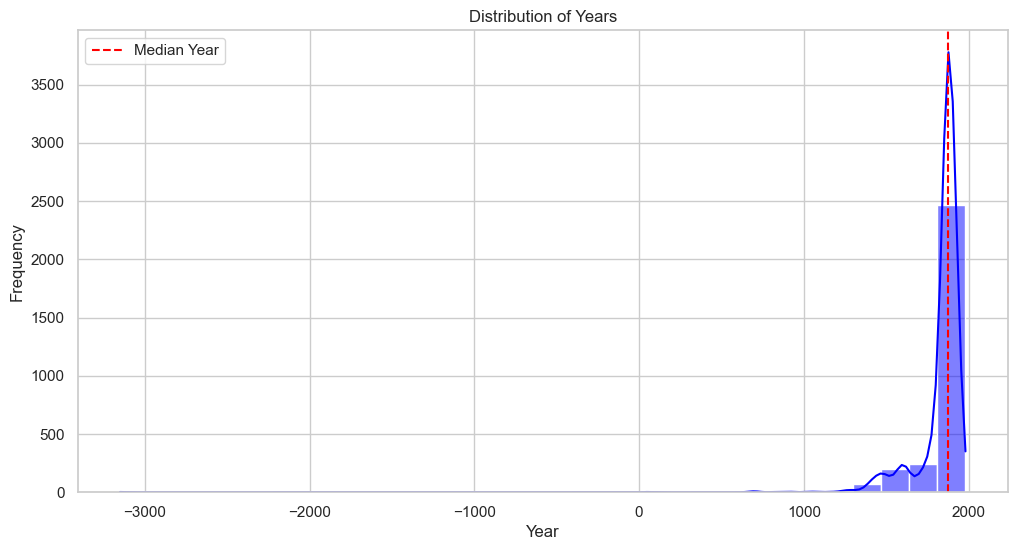

In [6]:
# YEARS

# get unique values from the 'year_born' column, sort them in ascending order, and select the first 10
top_10_lowest_years = df_merged['year_born'].sort_values().unique()[:10]
print('Unique lowest years:', top_10_lowest_years)

# plot the years distribution  
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(df_merged['year_born'], bins=30, kde=True, color='blue')
plt.title('Distribution of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.axvline(df_merged['year_born'].median(), color='red', linestyle='--', label='Median Year')
plt.legend()
plt.show()


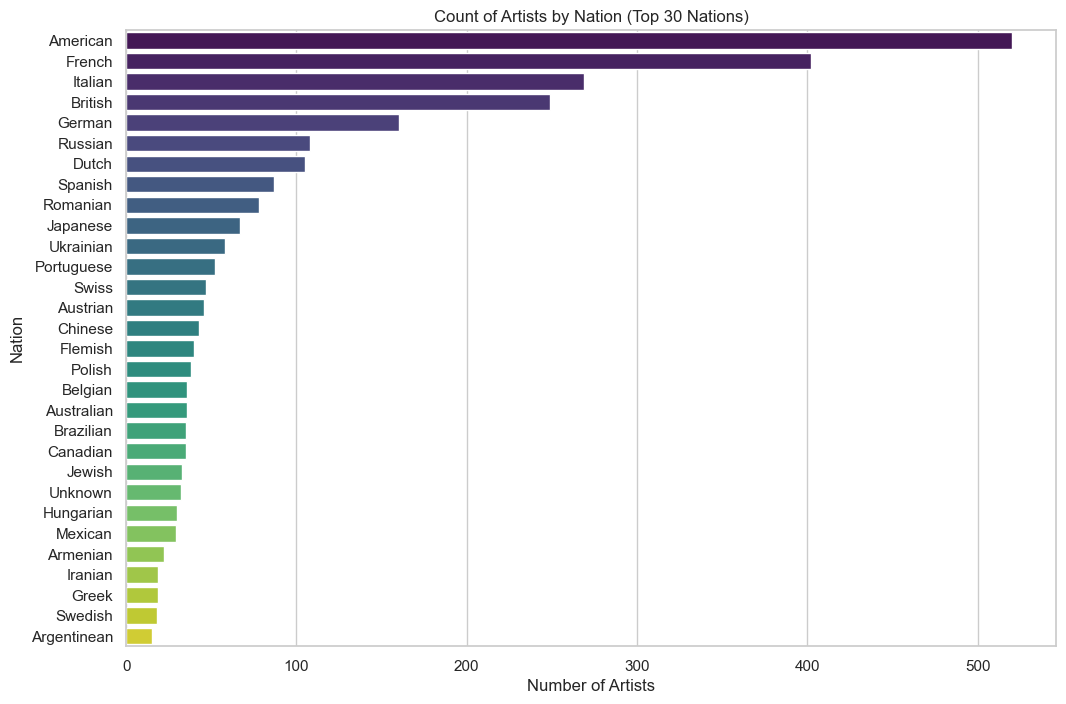

In [7]:
# NATIONS

# plot the nations distribution (top 30)
sns.set(style="whitegrid")
top_nations = df_merged['nation'].value_counts().nlargest(30).index
top_nations_df = df_merged[df_merged['nation'].isin(top_nations)]
plt.figure(figsize=(12, 8))
sns.countplot(data=top_nations_df, y='nation', order=top_nations, palette='viridis')
plt.title('Count of Artists by Nation (Top 30 Nations)')
plt.xlabel('Number of Artists')
plt.ylabel('Nation')
plt.show()

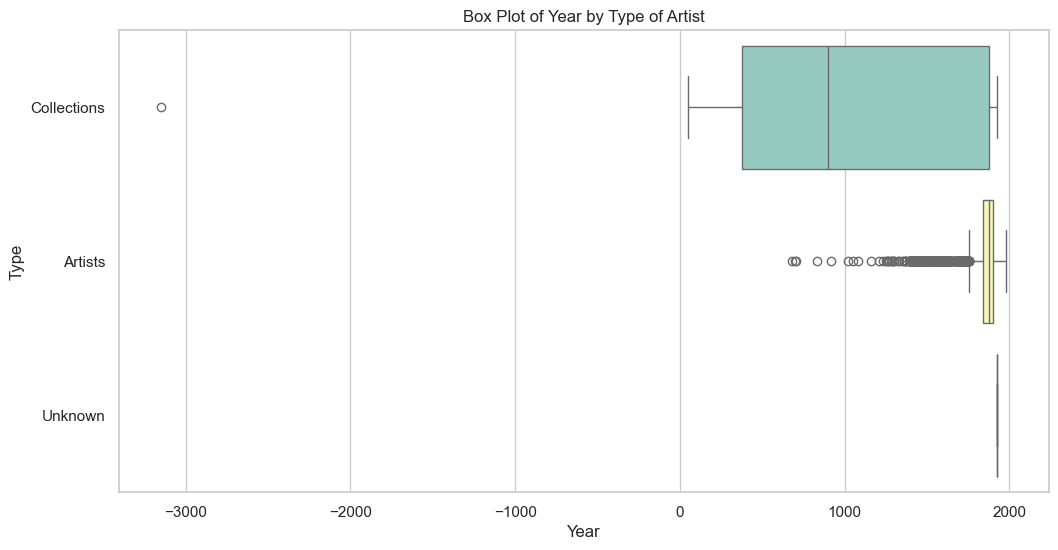

In [8]:
# TYPE

# plot type of artist
plt.figure(figsize=(12, 6))
sns.boxplot(x='year_born', y='type', data=df_merged, palette='Set3')
plt.title('Box Plot of Year by Type of Artist')
plt.xlabel('Year')
plt.ylabel('Type')
plt.show()


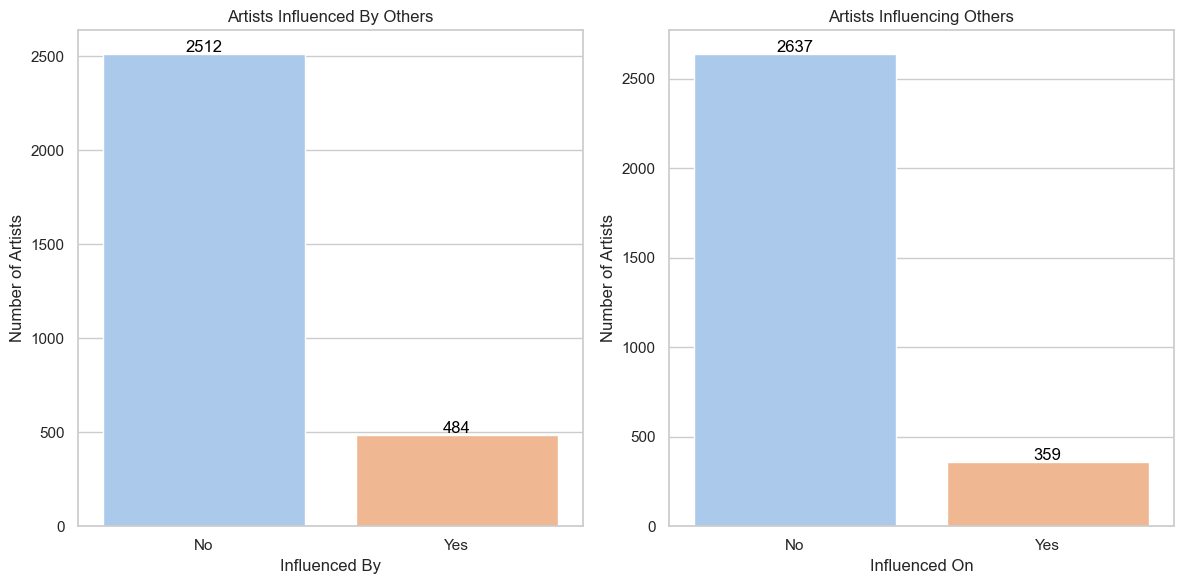

In [9]:
# INFLUENCE

# plot which artists have influenced_by / influenced_on

df_stat = df_relationships
df_stat['has_influenced_by'] = df_stat['influenced_by'].notnull().astype(int)
df_stat['has_influenced_on'] = df_stat['influenced_on'].notnull().astype(int)
# create binary counts for 'influenced_by' and 'influenced_on'
influenced_by_counts = df_stat['has_influenced_by'].value_counts()
influenced_on_counts = df_stat['has_influenced_on'].value_counts()

plt.figure(figsize=(12, 6))
# plot for 'influenced_by'
plt.subplot(1, 2, 1)
sns.barplot(x=influenced_by_counts.index, y=influenced_by_counts.values, palette='pastel')
plt.title('Artists Influenced By Others')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Influenced By')
plt.ylabel('Number of Artists')
# annotate bars
for index, value in enumerate(influenced_by_counts.values):
    plt.text(index, value + 10, str(value), ha='center', color='black')
# plot for 'influenced_on'
plt.subplot(1, 2, 2)
sns.barplot(x=influenced_on_counts.index, y=influenced_on_counts.values, palette='pastel')
plt.title('Artists Influencing Others')
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Influenced On')
plt.ylabel('Number of Artists')
# annotate bars
for index, value in enumerate(influenced_on_counts.values):
    plt.text(index, value + 10, str(value), ha='center', color='black')
plt.tight_layout()
plt.show()

***
# <span style="color: #f91974  ; font-weight: bold; font-size: 32px;">2.</span> <span style="color: #974efa  ; font-size: 32px;"><em>Networkx</em></span> 

- <span style="color: #cddeb3 ;"> Create a network based on the given data: consider the nodes, the edges, the
attributes, etc.</span> 
- <span style="color: #cddeb3 ;"> Visualize the network (or parts of the network) given visualization tools in python, if
needed use Cytoscape. </span>
- <span style="color: #cddeb3 ;"> BONUS points: interactive visualization (2 points) – you can get maxim 3 during
the entirety of the course. </span>

## <span style="color: #b889f9; font-size: 24px;"> Create the Network </span> 

We'll now use networkx to build a network of artists, relationships, institutions, and schools. Here df_merged is used to fill the nodes, while we transform df_relationships to fill the edges. 

In [10]:
# CREATE EDGES

df_relationships = df_relationships.rename(columns={'artistUrl':'artist_url'})
# split 'influenced_by' into individual entries and expand each one into separate rows
df_relationships['influenced_by'] = df_relationships['influenced_by'].str.split(',')
df_expanded = df_relationships.explode('influenced_by')
# strip any extra whitespace that might appear during the split
df_expanded['influenced_by'] = df_expanded['influenced_by'].str.strip()
# rename columns for clarity in edges
df_edges = df_expanded.rename(columns={'artist_url': 'node1', 'influenced_by': 'node2'})
# remove rows with NaN in either 'node1' or 'node2'
df_edges_clean = df_edges[['node1', 'node2']].dropna().reset_index(drop=True)
display(df_edges_clean[:10])
# convert to list of tuples, (optional) for insertion
edges = list(df_edges_clean.itertuples(index=False, name=None))
print(edges)


node1                                             node2
0                /en/apelles                        /en/ancient-greek-painting
1  /en/ancient-greek-pottery                        /en/ancient-greek-painting
2  /en/ancient-greek-pottery                     /en/ancient-egyptian-painting
3         /en/fayum-portrait                        /en/ancient-greek-painting
4         /en/fayum-portrait                     /en/ancient-egyptian-painting
5    /en/ambrogio-lorenzetti                                /en/simone-martini
6    /en/ambrogio-lorenzetti                                        /en/duccio
7    /en/ambrogio-lorenzetti                                        /en/giotto
8    /en/ambrogio-lorenzetti         /en/artists-by-art-movement/byzantine-art
9    /en/ambrogio-lorenzetti  /en/artists-by-painting-school/florentine-school

[('/en/apelles', '/en/ancient-greek-painting'), ('/en/ancient-greek-pottery', '/en/ancient-greek-painting'), ('/en/ancient-greek-pottery', '/en/ancient-egyptian-painting'), ('/en/fayum-portrait', '/en/ancient-greek-painting'), ('/en/fayum-portrait', '/en/ancient-egyptian-painting'), ('/en/ambrogio-lorenzetti', '/en/simone-martini'), ('/en/ambrogio-lorenzetti', '/en/duccio'), ('/en/ambrogio-lorenzetti', '/en/giotto'), ('/en/ambrogio-lorenzetti', '/en/artists-by-art-movement/byzantine-art'), ('/en/ambrogio-lorenzetti', '/en/artists-by-painting-school/florentine-school'), ('/en/orthodox-icons', '/en/byzantine-mosaics'), ('/en/orthodox-icons', '/en/fayum-portrait'), ('/en/ancient-greek-painting', '/en/apelles'), ('/en/ancient-greek-painting', '/en/ancient-greek-pottery'), ('/en/ancient-greek-painting', '/en/ancient-egyptian-painting'), ('/en/paolo-veneziano', '/en/artists-by-art-movement/byzantine-art'), ('/en/paolo-veneziano', '/en/artists-by-art-movement/gothic-art'), ('/en/giovanni-da-m

In [11]:
# EXTRACT NODES
# Load data into DataFrame, using the first row as the header
df_nodes = df_merged
# Extract node names from the 'artist_url' column
node_names = df_nodes['artist_url'].tolist()
# FILTER EDGES
# filter edges to include only those where both nodes exist in the nodes list
edges = [(node1, node2) for node1, node2 in edges if node1 in node_names and node2 in node_names]

df_relationships = df_relationships.rename(columns={'artistUrl':'artist_url'})


# CREATE GRAPH
G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
# Print graph info
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
# Calculate average degree
degree_sequence = [d for n, d in G.degree()]
avg_degree = sum(degree_sequence) / len(degree_sequence)
print("Average degree:", avg_degree)


# ADD ATTRIBUTES
# Create dictionaries for id and nation from DataFrame
id_dict = pd.Series(df_nodes['id'].values, index=node_names).to_dict()
nation_dict = pd.Series(df_nodes['nation'].values, index=node_names).to_dict()
name_dict = pd.Series(df_nodes['name'].values, index=node_names).to_dict()
total_works_dict = pd.Series(df_nodes['total_works'].values, index=node_names).to_dict()
movement_dict = pd.Series(df_nodes['movement'].values, index=node_names).to_dict()
type_dict = pd.Series(df_nodes['type'].values, index=node_names).to_dict()
city_dict = pd.Series(df_nodes['city'].values, index=node_names).to_dict()
country_dict = pd.Series(df_nodes['country'].values, index=node_names).to_dict()
institution_name_dict = pd.Series(df_nodes['institution_name'].values, index=node_names).to_dict()
school_name_dict = pd.Series(df_nodes['institution_name'].values, index=node_names).to_dict()
year_born_dict = pd.Series(df_nodes['year_born'].values, index=node_names).to_dict()
# Set node attributes
nx.set_node_attributes(G, id_dict, 'id')
nx.set_node_attributes(G, nation_dict, 'nation')
nx.set_node_attributes(G, name_dict, 'name')
nx.set_node_attributes(G, total_works_dict, 'total_works')
nx.set_node_attributes(G, movement_dict, 'movement')
nx.set_node_attributes(G, type_dict, 'type')
nx.set_node_attributes(G, city_dict, 'city')
nx.set_node_attributes(G, country_dict, 'country')
nx.set_node_attributes(G, institution_name_dict, 'institution_name')
nx.set_node_attributes(G, school_name_dict, 'school_name')
nx.set_node_attributes(G, year_born_dict, 'year_born')
# Print graph data to confirm
print("\nGraph content:")
print('NODES:', G.nodes(data=True))
print('EDGES:', G.edges(data=True))
print()
# loop through and print connected data for nodes
for n in G.nodes(): 
    print(n, G.nodes[n]['institution_name'])

Number of nodes: 2996
Number of edges: 1030
Average degree: 0.6875834445927904

Graph content:
NODES: [('/en/ancient-egyptian-painting', {'id': '5d230b31edc2c9fb74ae130a', 'nation': 'Egyptians', 'name': 'Ancient Egypt', 'total_works': 169, 'movement': 'Early Dynastic Period (3150 – 2686 BC),Old Kingdom (2686–2181 BC),1st Intermediate Period (2181–2055 BC),Middle Kingdom (2055–1650 BC),2nd Intermediate Period (1650–1550 BC),New Kingdom (1550–1069 BC),Amarna Period (1351 - 1334 BC),3rd Intermediate Period (1069–664 BC),Late Period (664–332 BC),Ptolemaic Period (332–30 BC)', 'type': 'Collections', 'city': 'Unknown', 'country': 'Unknown', 'institution_name': 'Unknown', 'school_name': 'Unknown', 'year_born': -3150.0}), ('/en/ancient-greek-pottery', {'id': '5ced09b1edc2c993247c1ea0', 'nation': 'Greeks', 'name': 'Ancient Greek Pottery', 'total_works': 87, 'movement': 'Geometric Period (c.900 - c.700 BC),Archaic Period (700-480 BC),Classical Period (480 - 323 BC),Hellenistic Period (323-31 BC)

In [12]:
# density
density = nx.density(G)
print("Network density:", density)

Network density: 0.00022957711004767625


## <span style="color: #b889f9; font-size: 24px;"> Visualize the Network </span> 

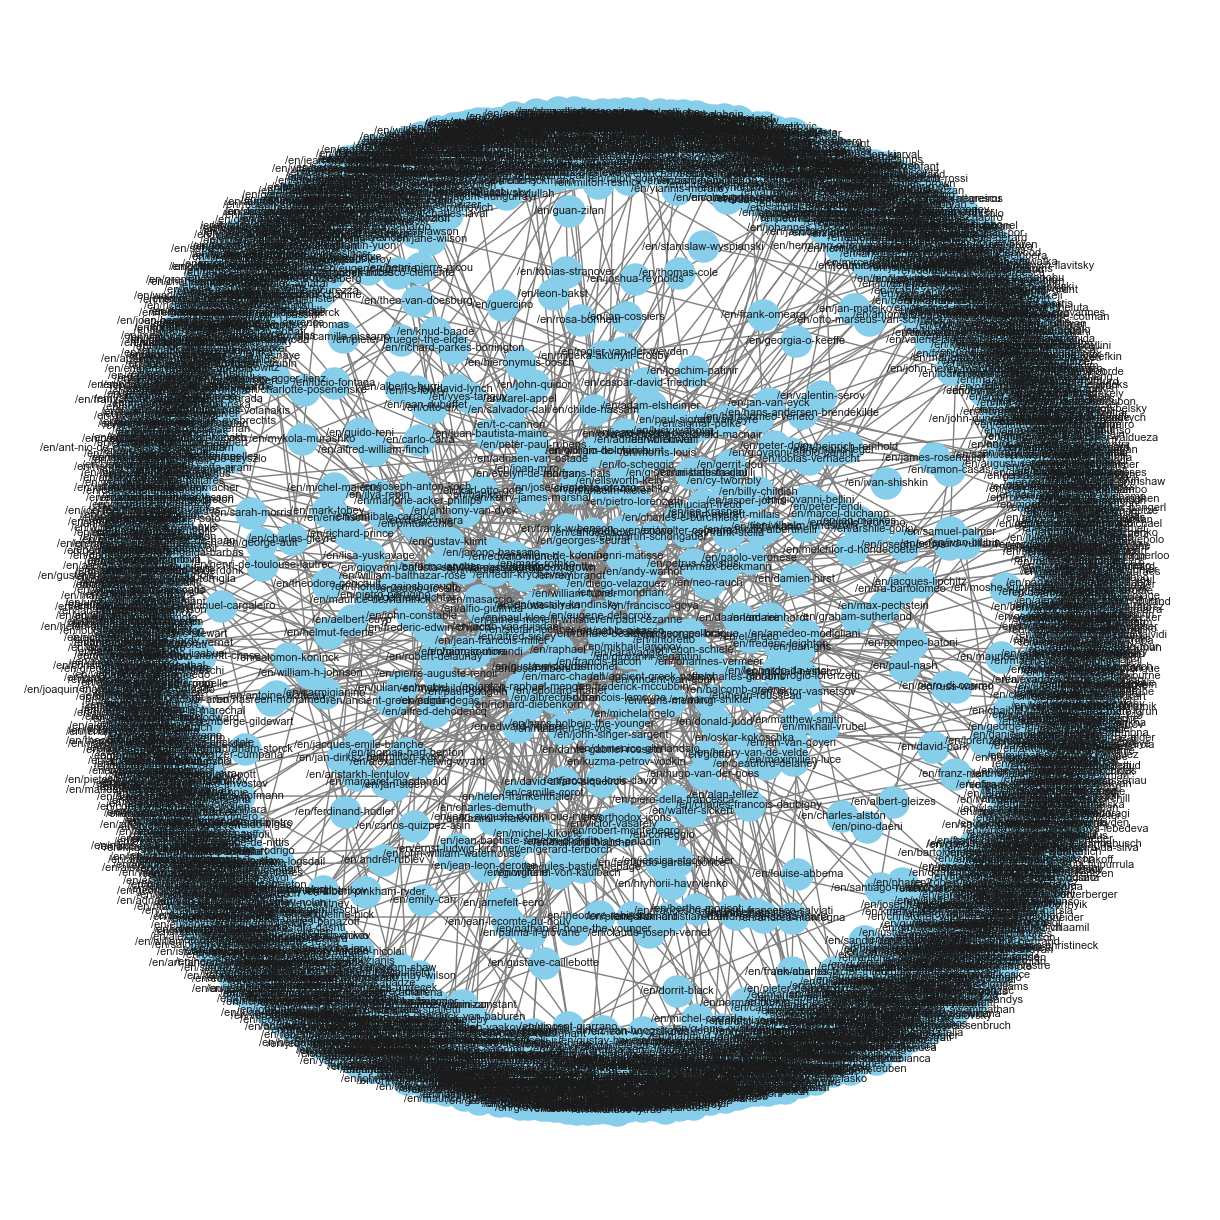

In [13]:
# PLOT THE GRAPH IN ENTIRETY
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size= 500, edge_color='gray', font_size=8) 

The network without any filtering applied is very difficult to read, due to the large number of nodes/edges. Next we extract the largest connected component and visualize that.

In [14]:
# VISUALIZE LARGEST CONNECTED SUBGRAPH

# get all connected components sorted by size (largest to smallest)
connected_components = sorted(nx.connected_components(G), key=len, reverse=True)
# extract the largest connected component as a subgraph
largest_connected_component = connected_components[0]
connected_subgraph = G.subgraph(largest_connected_component).copy()
# display information about the connected subgraph
print("Number of nodes in largest connected subgraph:", connected_subgraph.number_of_nodes())
print("Number of edges in largest connected subgraph:", connected_subgraph.number_of_edges())
print("Diameter of largest connected subgraph:", nx.diameter(connected_subgraph))
# print nodes and edges
print("Nodes in connected subgraph:", connected_subgraph.nodes(data=True))
print("Edges in connected subgraph:", connected_subgraph.edges(data=True))

Number of nodes in largest connected subgraph: 546
Number of edges in largest connected subgraph: 994
Diameter of largest connected subgraph: 14
Nodes in connected subgraph: [('/en/laszlo-moholy-nagy', {'id': '57726d8dedc2cb3880b49f42', 'nation': 'Hungarian', 'name': 'Laszlo Moholy-Nagy', 'total_works': 70, 'movement': 'Constructivism', 'type': 'Artists', 'city': 'Unknown', 'country': 'Unknown', 'institution_name': 'Unknown', 'school_name': 'Unknown', 'year_born': 1895.0}), ('/en/aaron-douglas', {'id': '5a3e7ff4edc2c9cfcc4208a7', 'nation': 'American', 'name': 'Aaron Douglas', 'total_works': 17, 'movement': 'Harlem Renaissance (New Negro Movement)', 'type': 'Artists', 'city': 'Unknown', 'country': 'Unknown', 'institution_name': 'Unknown', 'school_name': 'Unknown', 'year_born': 1899.0}), ('/en/fra-angelico', {'id': '57726d82edc2cb3880b48615', 'nation': 'Italian', 'name': 'Fra Angelico', 'total_works': 168, 'movement': 'Early Renaissance', 'type': 'Artists', 'city': 'Unknown', 'country': 

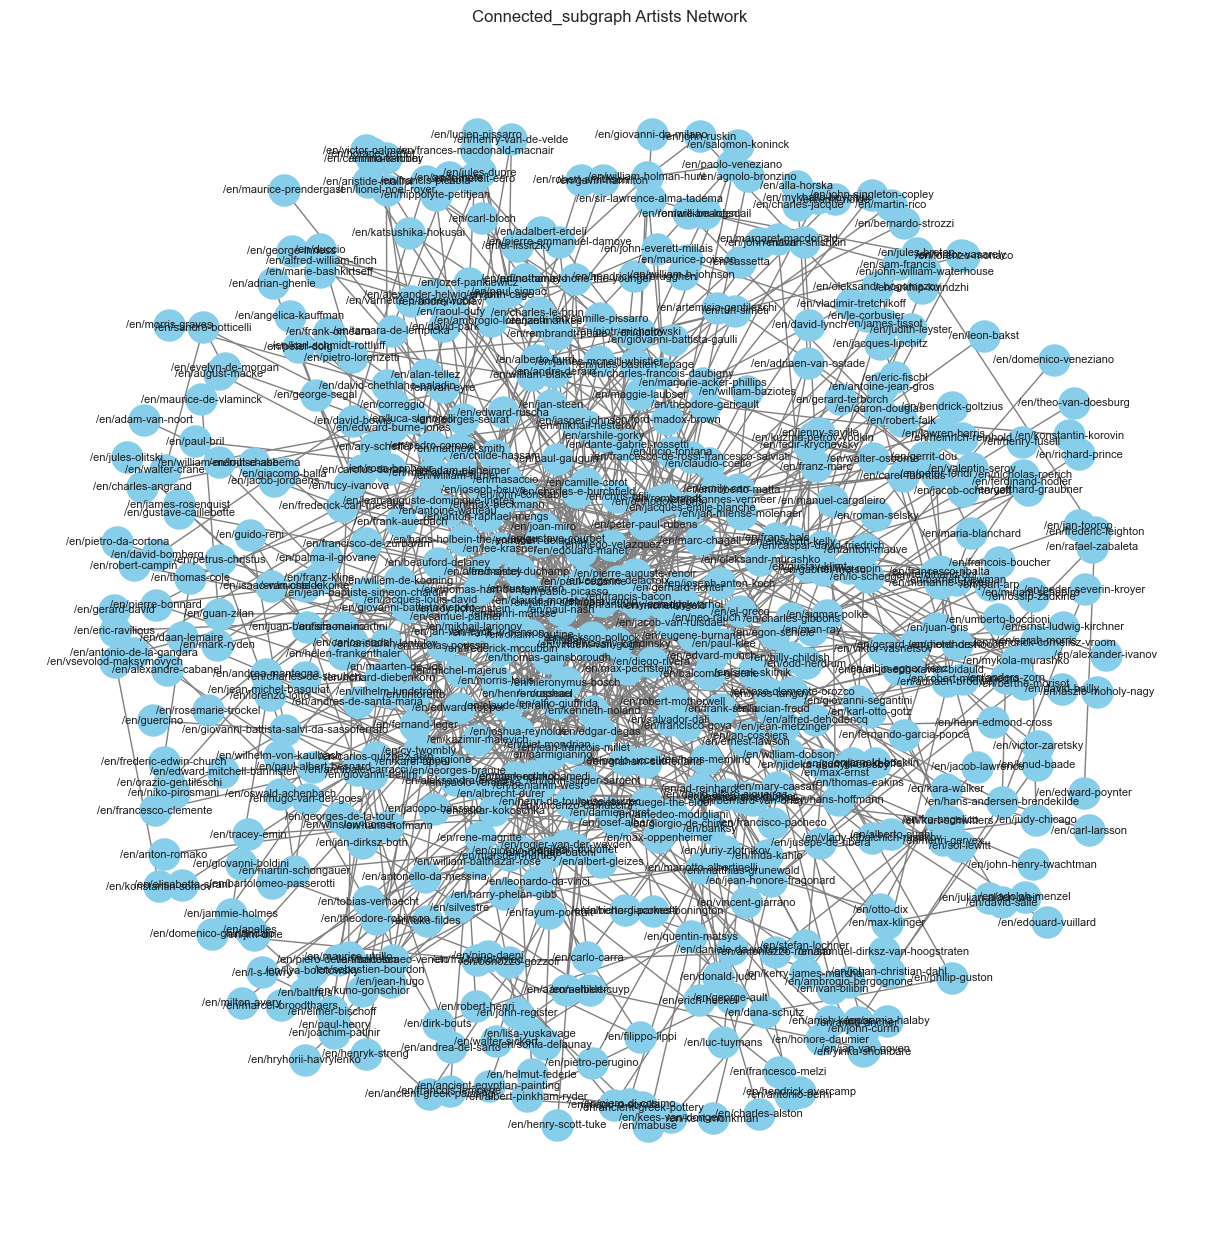

In [15]:
# plot
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(connected_subgraph, k=0.3)
nx.draw(connected_subgraph, 
        pos, 
        with_labels=True,
        node_color='skyblue',
        node_size=500,
        edge_color='grey',
        font_size=8)

plt.title("Connected_subgraph Artists Network")
plt.show()

## <span style="color: #b889f9; font-size: 24px;"> Interactive Visualization </span> 

We see that it is still very difficult to read. Next, we use a an interactive plot that allows for zooming into various parts of the network so it becomes easier to examine. 

In [16]:
# VISUALIZE IN INTERACTIVE PLOT

def create_plotly_network(G, width=800, height=600):
    # get node positions
    pos = nx.spring_layout(G)

    # create edges
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    # create nodes
    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        hoverinfo='text',
        text=list(G.nodes()),
        textposition="top center",
        marker=dict(
            showscale=True,
            colorscale='YlGnBu',
            size=20,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            )
        )
    )

    # color nodes by number of connections
    node_adjacencies = []
    for node in G.nodes():
        node_adjacencies.append(len(list(G.neighbors(node))))
    node_trace.marker.color = node_adjacencies

    # create the figure with specified width and height
    fig = go.Figure(data=[edge_trace, node_trace],
                 layout=go.Layout(
                    title='Artist Network Graph',
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20, l=5, r=5, t=40),
                    width=width,  # Set the width of the canvas
                    height=height,  # Set the height of the canvas
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
    
    fig.show()

# use the interactive plot with specified size
create_plotly_network(connected_subgraph, width=1500, height=1100) 


The above interactive chart can be zoomed in by highlighting a section, pick from the toolbar above to navigate in different directions.

In [17]:
# Finally, we can still investigate the connected component sizes. For readability only sizes above 2 printed.  
components = list(nx.connected_components(G))
components = [comp for comp in components if len(comp) > 2]
components = sorted(components, key=len, reverse=True)
comp_sizes = []
for comp in components:
    comp_sizes.append(len(comp))
    print("Component size:", len(comp))


Component size: 546
Component size: 7
Component size: 6
Component size: 4
Component size: 4
Component size: 3


***
# <span style="color: #f91974  ; font-weight: bold; font-size: 32px;">3.</span> <span style="color: #974efa  ; font-size: 32px;"><em>Network Analysis</em></span> 

- <span style="color: #cddeb3 ;"> CBased on diferenet network analysis techniques (centrality measures, community
analysis, clustering algorithms), answer the questions (Goals: 1-5) above.</span> 

1. Which were the most influential artists?
2. Which were the most influential movements?
3. Which were the most influential institutions?
4. Which nationalities concentrate the majority of artists?
5. Which are the biggest communities in the network?

We can use centrality measures like degree, betweenness, or eigenvector centrality to find the most influential artists, movements and institutions. For movements and institutions we aggregate by summing all all the artists connections, to find which movements/institutions were the most influential. Done this way we see how they inflence accross all artist connections, instead of just viewing their centrality as defined in connections accross single artists. 

For seeing which nationalities concentrate the majority of artists, we follow the same approach in addition to aggregating and anylazing total artists nationalities. For community analysis we use community detection modules. 

## <span style="color: #b889f9; font-size: 24px;"> Most Influential Artists </span> 

Here we use centrality measures degree/betweenness/eigenvector-centrality to find the most influential artists.

In [18]:
# CALCULATE ARTIST CENTRALITY/INFLUENCE

# calculate centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
# convert to DataFrame for easier analysis
centrality_df = pd.DataFrame({
    'Artist': G.nodes(),
    'Degree Centrality': [degree_centrality[node] for node in G.nodes()],
    'Betweenness Centrality': [betweenness_centrality[node] for node in G.nodes()],
    'Eigenvector Centrality': [eigenvector_centrality[node] for node in G.nodes()],
})
# sort by centrality measures
most_influential_by_degree = centrality_df.sort_values(by='Degree Centrality', ascending=False)
most_influential_by_betweenness = centrality_df.sort_values(by='Betweenness Centrality', ascending=False)
most_influential_by_eigenvector = centrality_df.sort_values(by='Eigenvector Centrality', ascending=False)

# display top 5 artists for each measure
print("Most Influential Artists by Degree Centrality:")
print(most_influential_by_degree.head())

print("\nMost Influential Artists by Betweenness Centrality:")
print(most_influential_by_betweenness.head())

print("\nMost Influential Artists by Eigenvector Centrality:")
print(most_influential_by_eigenvector.head())

Most Influential Artists by Degree Centrality:
                   Artist  Degree Centrality  Betweenness Centrality  Eigenvector Centrality
893     /en/pablo-picasso           0.011352                0.004315                0.319254
311      /en/paul-cezanne           0.010017                0.003680                0.272270
170   /en/gustave-courbet           0.007346                0.002173                0.204060
2642        /en/rembrandt           0.007346                0.002704                0.190376
2883       /en/caravaggio           0.007346                0.001792                0.154044

Most Influential Artists by Betweenness Centrality:
                    Artist  Degree Centrality  Betweenness Centrality  Eigenvector Centrality
893      /en/pablo-picasso           0.011352                0.004315                0.319254
311       /en/paul-cezanne           0.010017                0.003680                0.272270
836   /en/vincent-van-gogh           0.006678               

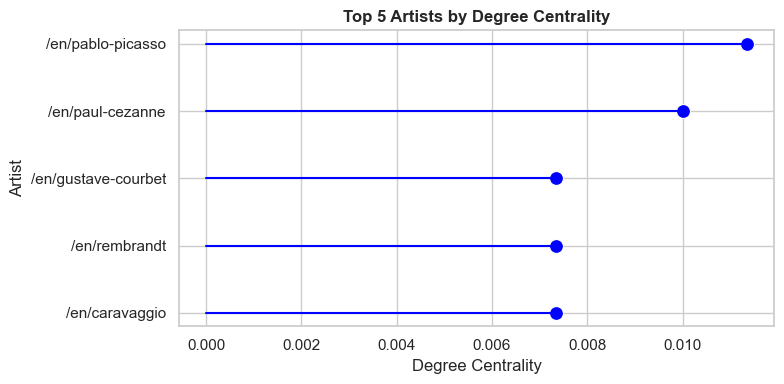

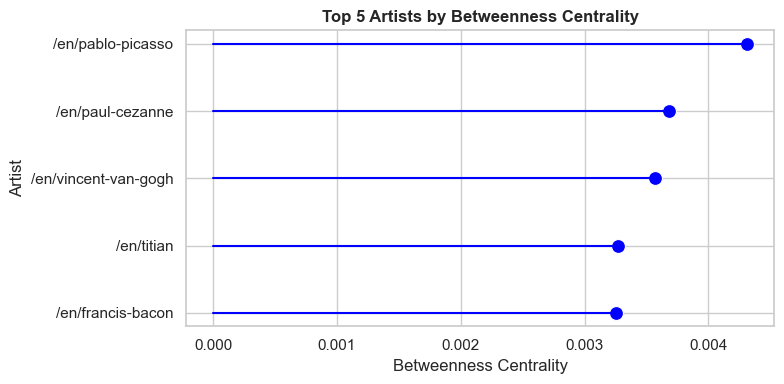

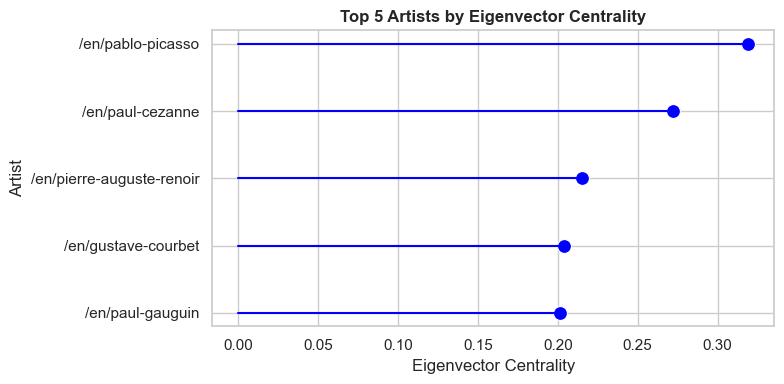

In [19]:
# PLOT ARTIST CENTRALITY/INFLUENCE

sns.set(style="whitegrid")
color_palette = "Blues"  
top_n = 5
plot_size = (8, 4)

# function to plot lollipop chart
def plot_lollipop(data, x_col, y_col, title, x_label):
    plt.figure(figsize=plot_size)
    sns.scatterplot(
        x=x_col, 
        y=y_col, 
        data=data.head(top_n), 
        color='blue', 
        s=100  # Dot size
    )
    for i in range(top_n):
        plt.plot(
            [0, data[x_col].values[i]], 
            [i, i], 
            color='blue', 
            linewidth=1.5
        )
    plt.title(title, fontweight='bold')
    plt.xlabel(x_label)
    plt.ylabel('Artist')
    plt.tight_layout()
    plt.show()

# Degree Centrality
plot_lollipop(
    most_influential_by_degree, 
    'Degree Centrality', 
    'Artist', 
    f'Top {top_n} Artists by Degree Centrality', 
    'Degree Centrality'
)

# Betweenness Centrality
plot_lollipop(
    most_influential_by_betweenness, 
    'Betweenness Centrality', 
    'Artist', 
    f'Top {top_n} Artists by Betweenness Centrality', 
    'Betweenness Centrality'
)

# Eigenvector Centrality
plot_lollipop(
    most_influential_by_eigenvector, 
    'Eigenvector Centrality', 
    'Artist', 
    f'Top {top_n} Artists by Eigenvector Centrality', 
    'Eigenvector Centrality'
)

Based on the above statistics the most influential artists were: Picasso, Cezanne, Courbet, Rembranndt, Carvaggio, Van-Gogh, Titian, Bacon, Renoir, Gaugin

## <span style="color: #b889f9; font-size: 24px;"> Most Influential Movements </span> 

Here we use centrality measures degree/betweenness/eigenvector-centrality to find the most influential movements.

In [20]:
# CALCULATE MOVEMENT CENTRALITY/INFLUENCE

# get the movement attribute for each node
movement_dict = nx.get_node_attributes(G, 'movement')
# create a DataFrame with both artist and movement information
centrality_df = pd.DataFrame({
    'Artist': G.nodes(),
    'Movement': [movement_dict.get(node, 'Unknown') for node in G.nodes()],
    'Degree Centrality': [degree_centrality[node] for node in G.nodes()],
    'Betweenness Centrality': [betweenness_centrality[node] for node in G.nodes()],
    'Eigenvector Centrality': [eigenvector_centrality[node] for node in G.nodes()],
})
# group by movement and calculate sum centrality measures
movement_influence = centrality_df.groupby('Movement').agg({
    'Degree Centrality': 'sum',
    'Betweenness Centrality': 'sum',
    'Eigenvector Centrality': 'sum',
    'Artist': 'count'  # this gives the number of artists in each movement
}).rename(columns={'Artist': 'Number of Artists'})

# sort by different centrality measures
print("Most Influential Movements by Sum Degree Centrality:")
print(movement_influence.sort_values(by='Degree Centrality', ascending=False).head())
print("\nMost Influential Movements by Sum Betweenness Centrality:")
print(movement_influence.sort_values(by='Betweenness Centrality', ascending=False).head())
print("\nMost Influential Movements by Sum Eigenvector Centrality:")
print(movement_influence.sort_values(by='Eigenvector Centrality', ascending=False).head())


Most Influential Movements by Sum Degree Centrality:
                          Degree Centrality  Betweenness Centrality  Eigenvector Centrality  Number of Artists
Movement                                                                                                      
Baroque                            0.049416                0.008657                1.007980                 86
Baroque,Dutch Golden Age           0.034391                0.005348                0.565145                 48
Impressionism                      0.031720                0.004586                0.837962                120
Romanticism                        0.030718                0.004449                0.446137                177
Realism                            0.028381                0.004702                0.621783                104

Most Influential Movements by Sum Betweenness Centrality:
                          Degree Centrality  Betweenness Centrality  Eigenvector Centrality  Number of Artists


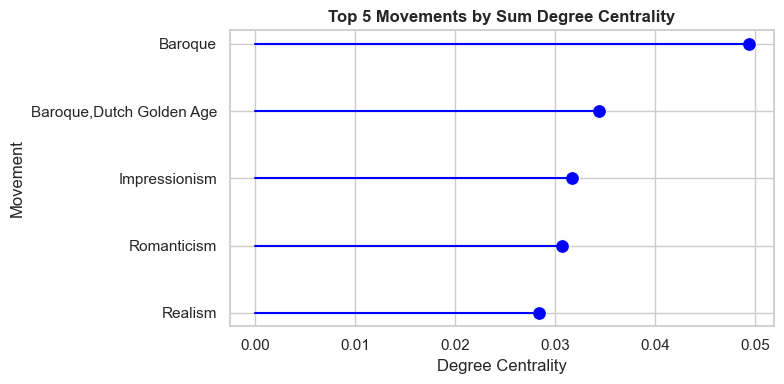

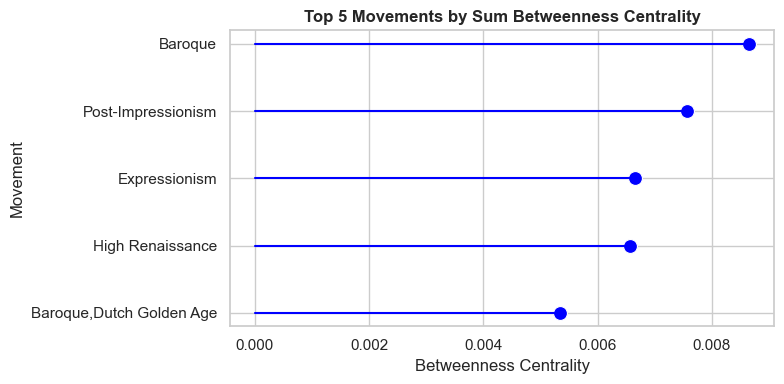

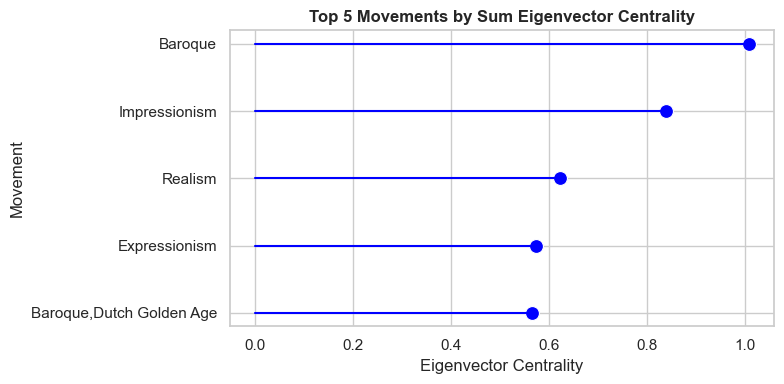

In [21]:
# PLOT MOVEMENT CENTRALITY/INFLUENCE

sns.set(style="whitegrid")
color_palette = "Blues"  
top_n = 5
plot_size = (8, 4)

# function to plot lollipop chart
def plot_lollipop_movements(data, x_col, y_col, title, x_label):
    plt.figure(figsize=plot_size)
    sns.scatterplot(
        x=x_col, 
        y=y_col, 
        data=data.head(top_n), 
        color='blue', 
        s=100  
    )
    for i in range(top_n):
        plt.plot(
            [0, data[x_col].values[i]], 
            [i, i], 
            color='blue', 
            linewidth=1.5
        )
    plt.title(title, fontweight='bold') 
    plt.xlabel(x_label)
    plt.ylabel('Movement')
    plt.tight_layout()
    plt.show()

# Degree Centrality
plot_lollipop_movements(
    movement_influence.sort_values(by='Degree Centrality', ascending=False), 
    'Degree Centrality', 
    'Movement', 
    f'Top {top_n} Movements by Sum Degree Centrality', 
    'Degree Centrality'
)

# Betweenness Centrality
plot_lollipop_movements(
    movement_influence.sort_values(by='Betweenness Centrality', ascending=False), 
    'Betweenness Centrality', 
    'Movement', 
    f'Top {top_n} Movements by Sum Betweenness Centrality', 
    'Betweenness Centrality'
)

# Eigenvector Centrality
plot_lollipop_movements(
    movement_influence.sort_values(by='Eigenvector Centrality', ascending=False), 
    'Eigenvector Centrality', 
    'Movement', 
    f'Top {top_n} Movements by Sum Eigenvector Centrality', 
    'Eigenvector Centrality'
)


Based on the above statistics the most influential movements were: Baroque, Baroque (Dutch Golden Age), Impressionism, Romanticism, Realism, Post-Impressionalism, Expressinism, High-Renaissance.

## <span style="color: #b889f9; font-size: 24px;"> Most influental Institutions </span> 

Here we use centrality measures degree/betweenness/eigenvector-centrality to find the most influential institutions.

In [22]:
# CALCULATE INSTITUTION CENTRALITY/INFLUENCE

# first get the movement attribute for each node
institution_dict = nx.get_node_attributes(G, 'institution_name')
# create a DataFrame with both artist and movement information
centrality_df = pd.DataFrame({
    'Artist': G.nodes(),
    'Institution': [institution_dict.get(node, 'Unknown') for node in G.nodes()],
    'Degree Centrality': [degree_centrality[node] for node in G.nodes()],
    'Betweenness Centrality': [betweenness_centrality[node] for node in G.nodes()],
    'Eigenvector Centrality': [eigenvector_centrality[node] for node in G.nodes()],
})
# group by movement and calculate mean centrality measures
institution_influence = centrality_df.groupby('Institution').agg({
    'Degree Centrality': 'sum',
    'Betweenness Centrality': 'sum',
    'Eigenvector Centrality': 'sum',
    'Artist': 'count'  # this gives the number of artists in each movement
}).rename(columns={'Artist': 'Number of Artists'})

# sort by different centrality measures
print("Most Influential Institutions by Sum Degree Centrality:")
print(institution_influence.sort_values(by='Degree Centrality', ascending=False).head())
print("\nMost Influential Institutions by Sum Betweenness Centrality:")
print(institution_influence.sort_values(by='Betweenness Centrality', ascending=False).head())
print("\nMost Influential Institutions by Sum Eigenvector Centrality:")
print(institution_influence.sort_values(by='Eigenvector Centrality', ascending=False).head())


Most Influential Institutions by Sum Degree Centrality:
                                               Degree Centrality  Betweenness Centrality  Eigenvector Centrality  Number of Artists
Institution                                                                                                                        
Unknown                                                 0.440401                0.078182                6.999991               2518
École des Beaux-Arts                                    0.036728                0.007608                0.829151                 52
Guild of Saint Luke                                     0.023038                0.003592                0.329665                 30
Real Academia de Bellas Artes de San Fernando           0.020033                0.006025                0.496235                 13
Royal Academy of Arts (RA)                              0.014023                0.001919                0.181913                 25

Most Influential In

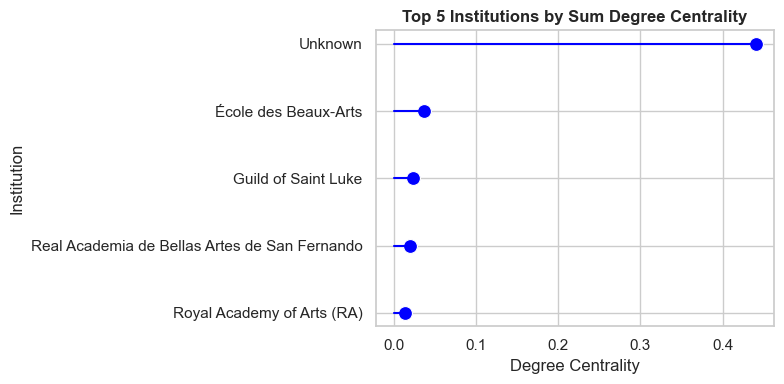

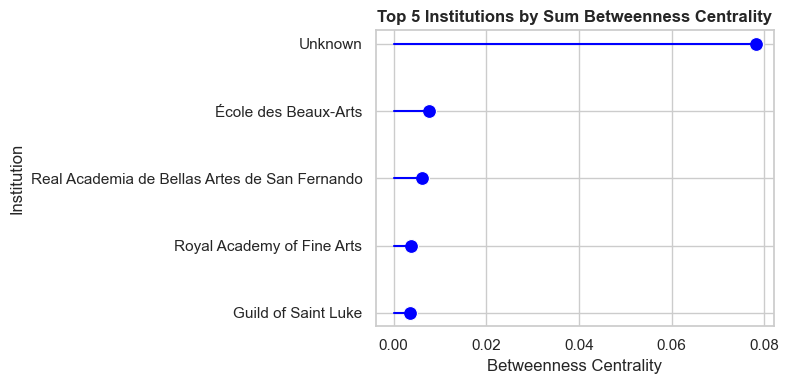

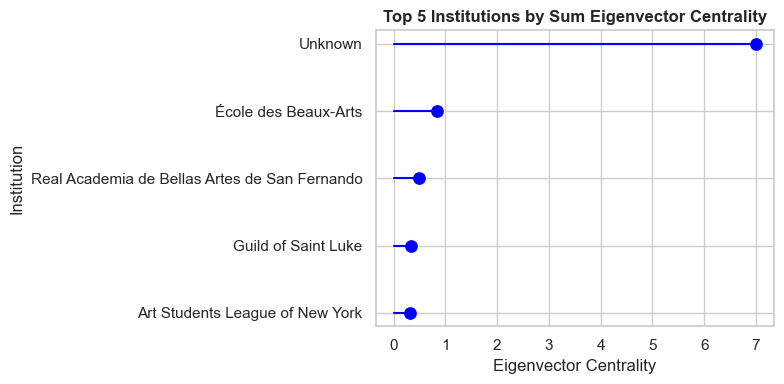

In [23]:
# PLOT INSTITUTION CENTRALITY/INFLUENCE

sns.set(style="whitegrid")
color_palette = "Blues"  
top_n = 5
plot_size = (8, 4)

# function to plot lollipop chart 
def plot_lollipop_institutions(data, x_col, y_col, title, x_label):
    plt.figure(figsize=plot_size)
    sns.scatterplot(
        x=x_col, 
        y=y_col, 
        data=data.head(top_n), 
        color='blue', 
        s=100  
    )
    for i in range(top_n):
        plt.plot(
            [0, data[x_col].values[i]], 
            [i, i], 
            color='blue', 
            linewidth=1.5
        )
    plt.title(title, fontweight='bold') 
    plt.xlabel(x_label)
    plt.ylabel('Institution')
    plt.tight_layout()
    plt.show()

# Degree Centrality
plot_lollipop_institutions(
    institution_influence.sort_values(by='Degree Centrality', ascending=False), 
    'Degree Centrality', 
    'Institution', 
    f'Top {top_n} Institutions by Sum Degree Centrality', 
    'Degree Centrality'
)

# Betweenness Centrality
plot_lollipop_institutions(
    institution_influence.sort_values(by='Betweenness Centrality', ascending=False), 
    'Betweenness Centrality', 
    'Institution', 
    f'Top {top_n} Institutions by Sum Betweenness Centrality', 
    'Betweenness Centrality'
)

# Eigenvector Centrality
plot_lollipop_institutions(
    institution_influence.sort_values(by='Eigenvector Centrality', ascending=False), 
    'Eigenvector Centrality', 
    'Institution', 
    f'Top {top_n} Institutions by Sum Eigenvector Centrality', 
    'Eigenvector Centrality'
)


Based on the above statistics the most influential institutions were: Ecole des Beaux-Arts, Guild of Saint-Luke, Real Academia, RA, Royal Academy of Fine Arts, Art Students League of New York.

## <span style="color: #b889f9; font-size: 24px;"> Nationalities of Artists </span> 

Here we aggregate nationality of artists, and use centrality measures degree/betweenness/eigenvector-centrality to find the most influential nationalities.

nation
American    520
French      402
Italian     269
British     249
German      160
Russian     108
Dutch       105
Spanish      87
Romanian     78
Japanese     67
Name: count, dtype: int64


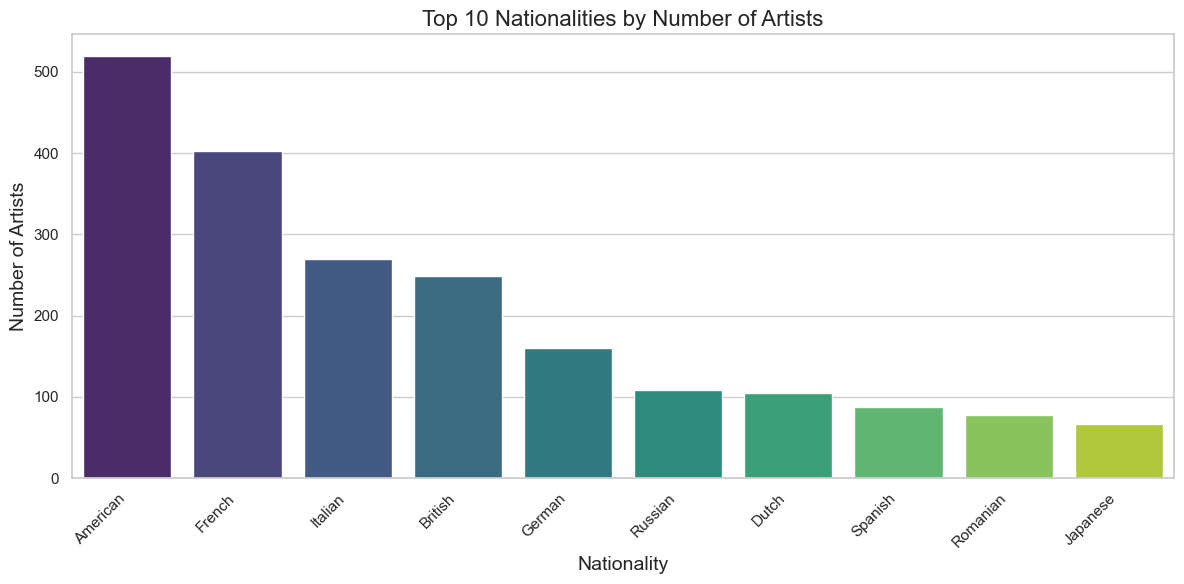

In [24]:
# AGGREGATE ARTIST NATIONALITY 

# count the number of artists by nationality
nationality_counts = df_merged['nation'].value_counts()
# top 10 
top_nationalities = nationality_counts.head(10)
# print
print(top_nationalities)
# visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=top_nationalities.index, y=top_nationalities.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Nationalities by Number of Artists', fontsize=16)
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Number of Artists', fontsize=14)
plt.tight_layout()
plt.show()


In [25]:
# CALCULATE NATIONALITY CENTRALITY/INFLUENCE

# first, get the nationality attribute for each node
nationality_dict = nx.get_node_attributes(G, 'nation')
# Create a DataFrame with both artist and nationality information
centrality_df = pd.DataFrame({
    'Artist': G.nodes(),
    'Nationality': [nationality_dict.get(node, 'Unknown') for node in G.nodes()],
    'Degree Centrality': [degree_centrality[node] for node in G.nodes()],
    'Betweenness Centrality': [betweenness_centrality[node] for node in G.nodes()],
    'Eigenvector Centrality': [eigenvector_centrality[node] for node in G.nodes()],
})
# group by nationality and calculate sum centrality measures
nationality_influence = centrality_df.groupby('Nationality').agg({
    'Degree Centrality': 'sum',
    'Betweenness Centrality': 'sum',
    'Eigenvector Centrality': 'sum',
    'Artist': 'count'  # this gives number of artists in each nationality
}).rename(columns={'Artist': 'Number of Artists'})

# sort by different centrality measures
print("Most Influential Nationalities by Sum Degree Centrality:")
print(nationality_influence.sort_values(by='Degree Centrality', ascending=False).head())
print("\nMost Influential Nationalities by Sum Betweenness Centrality:")
print(nationality_influence.sort_values(by='Betweenness Centrality', ascending=False).head())
print("\nMost Influential Nationalities by Sum Eigenvector Centrality:")
print(nationality_influence.sort_values(by='Eigenvector Centrality', ascending=False).head())


Most Influential Nationalities by Sum Degree Centrality:
             Degree Centrality  Betweenness Centrality  Eigenvector Centrality  Number of Artists
Nationality                                                                                      
French                0.152254                0.030060                3.540635                402
American              0.100167                0.012324                1.625111                520
Italian               0.097830                0.020983                1.174212                269
British               0.054758                0.010050                0.756152                249
Dutch                 0.051753                0.010642                0.903747                105

Most Influential Nationalities by Sum Betweenness Centrality:
             Degree Centrality  Betweenness Centrality  Eigenvector Centrality  Number of Artists
Nationality                                                                                     

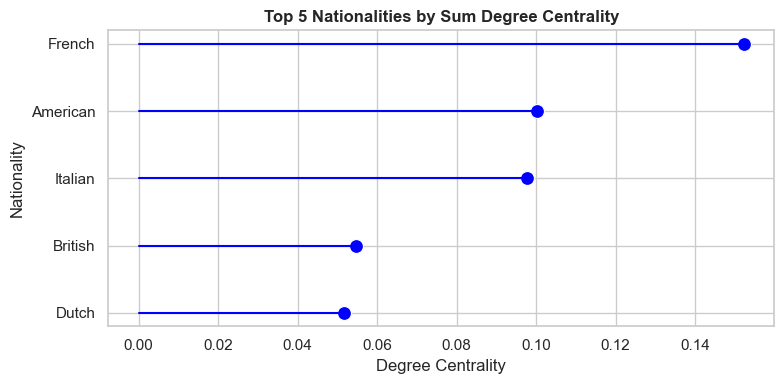

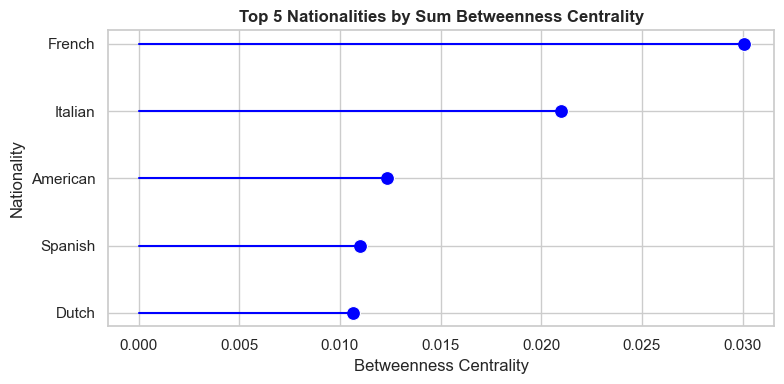

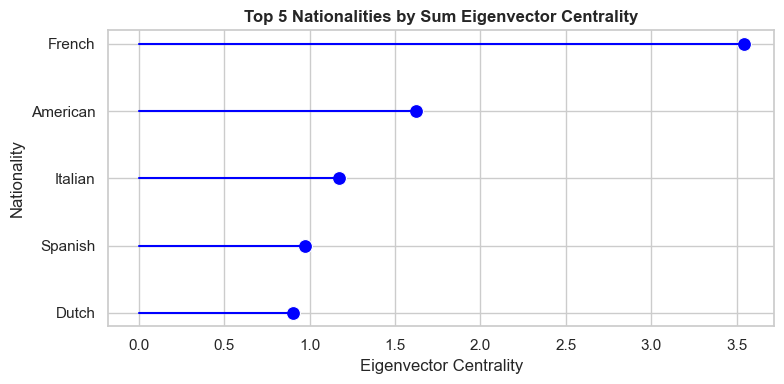

In [26]:
# PLOT NATIONALITY CENTRALITY/INFLUENCE

sns.set(style="whitegrid")
color_palette = "Blues"  
top_n = 5
plot_size = (8, 4)

# function to plot lollipop chart 
def plot_lollipop_nationalities(data, x_col, y_col, title, x_label):
    plt.figure(figsize=plot_size)
    sns.scatterplot(
        x=x_col, 
        y=y_col, 
        data=data.head(top_n), 
        color='blue', 
        s=100  # Dot size
    )
    for i in range(top_n):
        plt.plot(
            [0, data[x_col].values[i]], 
            [i, i], 
            color='blue', 
            linewidth=1.5
        )
    plt.title(title, fontweight='bold')  # Bold title
    plt.xlabel(x_label)
    plt.ylabel('Nationality')
    plt.tight_layout()
    plt.show()

# Degree Centrality
plot_lollipop_nationalities(
    nationality_influence.sort_values(by='Degree Centrality', ascending=False), 
    'Degree Centrality', 
    'Nationality', 
    f'Top {top_n} Nationalities by Sum Degree Centrality', 
    'Degree Centrality'
)

# Betweenness Centrality
plot_lollipop_nationalities(
    nationality_influence.sort_values(by='Betweenness Centrality', ascending=False), 
    'Betweenness Centrality', 
    'Nationality', 
    f'Top {top_n} Nationalities by Sum Betweenness Centrality', 
    'Betweenness Centrality'
)

# Eigenvector Centrality
plot_lollipop_nationalities(
    nationality_influence.sort_values(by='Eigenvector Centrality', ascending=False), 
    'Eigenvector Centrality', 
    'Nationality', 
    f'Top {top_n} Nationalities by Sum Eigenvector Centrality', 
    'Eigenvector Centrality'
)


Based on the above statistics the nationality (top 3) of most artists are: American, French, Italian.

The most influential nationalities (top 3) were: Frnch, American, Italian 

## <span style="color: #b889f9; font-size: 24px;"> Community Detection </span> 

We can use community detection algorithms to identify the largest communities.

In [27]:
# COMMUNITY DETECTION

# detect communities using the greedy modularity algorithm
communities = community.greedy_modularity_communities(G)

# loop through the list of communities
for i, c in enumerate(communities):
    if len(c) > 2:  # filter out modularity classes with 2 or fewer nodes
        print(f'Class {i}: Size = {len(c)}, Members = {list(c)}')  # print class number, size, and members

# create a blank dictionary for modularity
modularity_dict = {}
for i, c in enumerate(communities):  # loop through communities
    for name in c:  # loop through each member of a community
        modularity_dict[name] = i  # create entry in the dictionary

# add modularity information as node attributes
nx.set_node_attributes(G, modularity_dict, 'modularity')

Class 0: Size = 98, Members = ['/en/laszlo-moholy-nagy', '/en/daan-lemaire', '/en/erich-heckel', '/en/knud-baade', '/en/helen-frankenthaler', '/en/ilya-bolotowsky', '/en/otto-dix', '/en/wassily-kandinsky', '/en/mark-rothko', '/en/jules-olitski', '/en/henri-rousseau', '/en/ivan-eyre', '/en/john-cage', '/en/robert-delaunay', '/en/jean-michel-basquiat', '/en/arshile-gorky', '/en/ad-reinhardt', '/en/henryk-streng', '/en/max-ernst', '/en/roberto-matta', '/en/hans-hofmann', '/en/marc-chagall', '/en/august-macke', '/en/pablo-picasso', '/en/johan-christian-dahl', '/en/matthias-grunewald', '/en/robert-motherwell', '/en/jackson-pollock', '/en/frank-stella', '/en/cy-twombly', '/en/max-beckmann', '/en/kenneth-noland', '/en/jean-arp', '/en/piet-mondrian', '/en/karel-appel', '/en/helmut-federle', '/en/salvador-dali', '/en/jammie-holmes', '/en/lee-krasner', '/en/arkhip-kuindzhi', '/en/kazimir-malevich', '/en/yuriy-zlotnikov', '/en/caspar-david-friedrich', '/en/arnold-bocklin', '/en/man-ray', '/en/ell

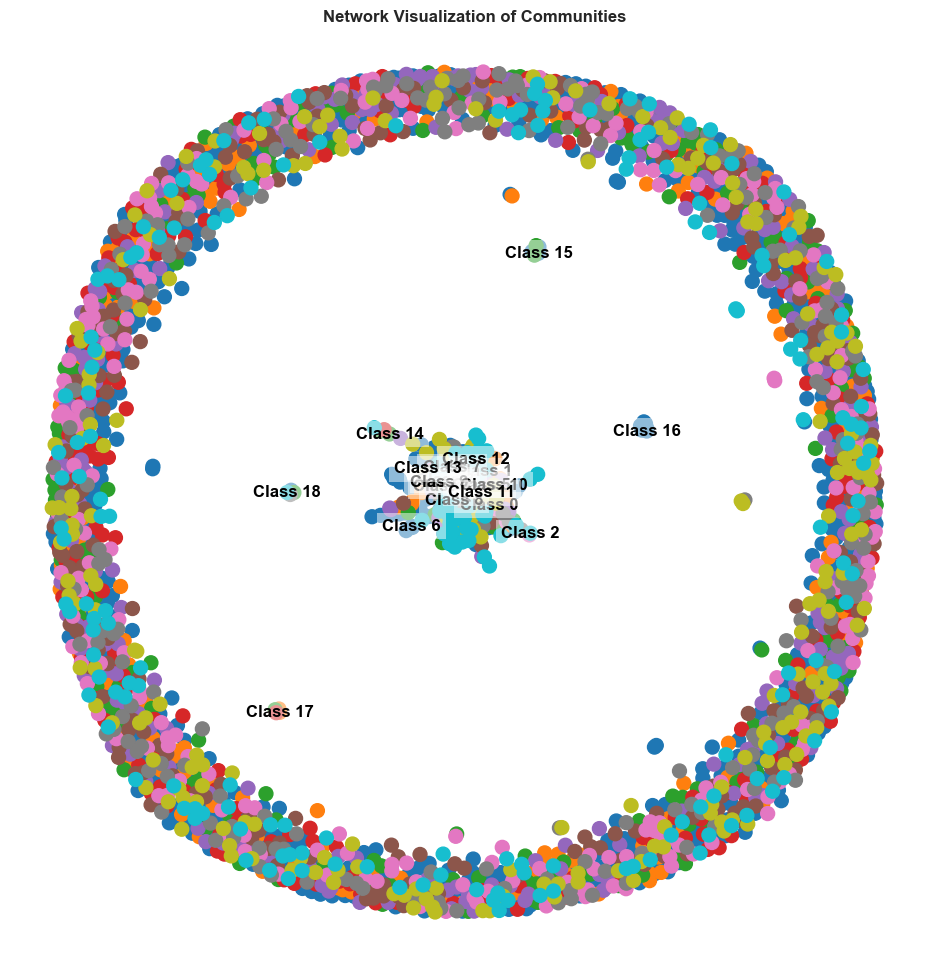

In [28]:
# VISUALIZE THE COMMUNITIES

# create a color map for the communities
color_map = []

# assign a unique color to each community
for i, c in enumerate(communities):
    for node in c:
        color_map.append(i)  # assigning a color based on community index

# set the size of the figure
plt.figure(figsize=(12, 12))

# draw the graph with node colors based on communities
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=100, cmap=plt.cm.tab10, node_color=color_map)
nx.draw_networkx_edges(G, pos, alpha=0.5)

# get the top 19 largest communities
largest_communities = sorted(communities, key=len, reverse=True)[:19]

# draw the labels for the community classes for the top 19 communities
for i, community in enumerate(largest_communities):
    # convert the frozenset to a list to access its elements
    community_list = list(community)
    
    # get the first node in the community to place the label
    if community_list:
        node = community_list[0]  # choose the first node as a representative
        plt.text(pos[node][0], pos[node][1], f'Class {i}', fontsize=12, fontweight='bold', 
                 color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# title and axis
plt.title("Network Visualization of Communities", fontweight='bold')
plt.axis('off')  
plt.show()


The biggest communities are listed above as class 0 through 19.